# Support notebook for statistics and plots in section EDA of the report

In [19]:
import pandas as pd
import numpy as np
import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.pyplot import figure
from scipy.fft import rfft, rfftfreq, rfft, irfft, fftfreq, fft
import scipy
import math
from sklearn.decomposition import PCA
from scipy.ndimage import gaussian_filter1d
import plotly.express as px
import plotly.subplots as ps
import dash_core_components as dcc
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import dataframe_image as dfi

##### create dataframe with descriptive statistics from dictionary with all datasets

In [2]:
dataset_dict = {}
for i in ['A', 'AA', 'AB', 'AC', 'AD', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']:
    path = '01 - Raw Data/data_{}.xlsx'.format(i)
    dataset_dict['df{}'.format(i)] = pd.read_excel(path)

for i in range(1, 21):
    path = '01 - Raw Data/Delivery 2 (enkel koelkast)/data_{}.xlsx'.format(i)
    dataset_dict['df{}'.format(i)] = pd.read_excel(path)

In [3]:
stats = pd.DataFrame(data=[dataset_dict[i]['Temp'].describe() for i in dataset_dict]).T
stats.columns = [i for i in dataset_dict]

In [48]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
stats

,dfA,dfAA,dfAB,dfAC,dfAD,dfB,dfC
count,312657.00,297482.00,530979.00,327225.00,324095.00,315826.00,520147.00
mean,17.36,-18.46,17.40,33.22,17.96,5.67,11.34
std,9.04,5.91,6.46,15.64,8.28,0.92,6.81
min,-28.00,-26.77,-29.99,-20.35,-30.25,0.47,-40.06
25%,13.51,-21.21,15.97,21.30,18.17,5.51,4.84
50%,18.89,-20.40,19.30,23.21,20.29,5.61,12.34
75%,22.58,-18.20,21.51,45.66,21.90,5.70,17.03
max,47.68,32.55,55.78,63.99,42.66,30.09,69.98


In [60]:
dfi.export(stats, 'datasets statistics.png', max_cols=-1)

##### code used to create plots in EDA part with custom date axes

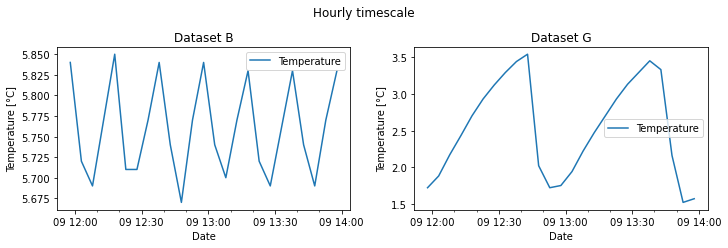

In [83]:
index = 5995
period = 12*2+1
dfG = dataset_dict['dfG'][['EventDt', 'Temp']][index:index+period]
dfB = dataset_dict['dfB'][['EventDt', 'Temp']][index+2:index+period+2]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3), constrained_layout=True)
fig.suptitle('Hourly timescale', y=1.1)
    #plot original data
ax1.plot(dfB['EventDt'], dfB['Temp'], label='Temperature')
ax1.xaxis.set_major_locator(mdates.MinuteLocator(byminute=(0,30,60,90,120)))
ax1.xaxis.set_minor_locator(mdates.MinuteLocator(byminute=(10,20,40,50,70,80,100)))
ax1.set_title("Dataset B")
ax1.set_xlabel("Date")
ax1.set_ylabel("Temperature [°C]")
ax1.legend()

ax2.plot(dfG['EventDt'], dfG['Temp'], label='Temperature')
ax2.xaxis.set_major_locator(mdates.MinuteLocator(byminute=(0,30,60,90,110)))
ax2.xaxis.set_minor_locator(mdates.MinuteLocator(byminute=(10,20,40,50,70,80,100)))
ax2.set_title("Dataset G")
ax2.set_xlabel("Date")
ax2.set_ylabel("Temperature [°C]")
ax2.legend()
fig.savefig('thesis plots/EDA hourly.png', bbox_inches='tight')
plt.show()
# dataset_dict['dfG'][['EventDt', 'Temp']].plot(x='EventDt', y='Temp')